In [4]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm # color stuff
%matplotlib inline

def pltPrintPar():
    plt.rcParams.update({'font.size': 15})
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markersize'] = 8

rootTP="/home/johann/Remote/imac"
rootMAC="/Users/jh"
root=rootTP

In [5]:
def readTracerData(k,p,u,trigger,t='200'):
    tracerdata = []
    posfile = root+'/Documents/workspace-cpp/SingleParticleSimulation/Release/sim_data/noreset/'+trigger
    posfile += '/t'+str(t)+'/dt0.0005/d0/b10/p'+p+'/k'+k+'/u'+u+'/Coordinates/trajectory.txt'
    with open(posfile, 'r') as f:
        for i, line in enumerate(f):
            lines = line.split()
            tracerdata.append(lines)
    return  (np.asarray(tracerdata)).astype(float)



#rotate matrix - from http://stackoverflow.com/questions/6802577/python-rotation-of-3d-vector
def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    theta = np.asarray(theta)
    axis = axis/math.sqrt(np.dot(axis, axis))
    a = math.cos(theta/2.0)
    b, c, d = -axis*math.sin(theta/2.0)
    aa, bb, cc, dd = a*a, b*b, c*c, d*d
    bc, ad, ac, ab, bd, cd = b*c, a*d, a*c, a*b, b*d, c*d
    return np.array([[aa+bb-cc-dd, 2*(bc+ad), 2*(bd-ac)],
                     [2*(bc-ad), aa+cc-bb-dd, 2*(cd+ab)],
                     [2*(bd+ac), 2*(cd-ab), aa+dd-bb-cc]])
#EXAMPLE
# v = [3, 5, 0]
# axis = [4, 4, 1]
# theta = 1.2 
#
# print(np.dot(rotation_matrix(axis,theta), v)) 
# >>>> [ 2.74911638  4.77180932  1.91629719]

In [6]:
pltPrintPar()
i=0
for u in us:
    for k in ks:
        krel = float(k)/10.
        data = ranRodtracerData[i]
        ts = data[:,0]
        xs =  data[:,1]
        ys =  data[:,2]
        zs =  data[:,3]
        plt.figure(figsize=(7,5))
        plt.plot(ts,xs,'r-',label='x')
        plt.plot(ts,ys,'g-',label='y')
        plt.plot(ts,zs,'b-',label='z')
        #plt.xlim([0,10000])
        #plt.ylim([-15,43])
        plt.ylabel(r'$displacement$')
        plt.xlabel(r'$tD_0/b^2$')
        plt.title(r'$U_0 = '+u+'k_BT$ , $k = '+str(krel)+'b$')
        plt.grid()
        plt.legend()
        plt.show()
        i+=1

NameError: name 'ranRodtracerData' is not defined

# TODO  Calculate time from simulation time:
$$t = N_{steps} \Delta t = \frac{t_{sim}}{\tilde{\mu}} \Delta t = t_{sim} \frac{b^2}{\mu_0 k_B T}$$
So how many time steps are one second? (the measuring time of lieleg et al)
Stokes–Einstein–Sutherland equation: 
$$\mu_0 = \frac{1}{3 \pi \eta p}$$
where, for water, the dynamic viscosity $\eta = 0.89 cP = 0.89\cdot 10^{-3} kg \cdot m^{−1}\cdot s^{−1}$ (cP is centiPoise).
Hence, for $p = 1$ micrometer$=10^{-6}$m


In [13]:
p_exp = 0.3e-6 #accoring to Lieleg paper figure 3
b_exp = 2.5e-6 # 2um < b < 3um according to Lieleg for Matrigel
xweight = b_exp/10 * 1e6
mu0 = 1/(3*np.pi*0.89e-3 * p_exp)
print('mu_0 =',mu0)
tweight = (b_exp)**2/(mu0 * 4.11e-21)
print('time step in seconds: dt =',tweight*0.0001)
print('t = t_sim *',tweight)

mu_0 = 397390619.45541906
time step in seconds: dt = 0.00038266662340715103
t = t_sim * 3.82666623407151


# Using random ROD model

In [6]:
ks=['1.000','0.700']
p='1.2'
us=['-5','-8','-9','-10']
ranRodtracerData=[]
for u in us:
    for k in ks:
        tracerdata = []
        posfile = '/home/johann/Remote2/SPS/sim/Release/sim_data/noreset/ranRod/nrods1'
        posfile += '/dt0.0001/t200/d0/b10/p'+p+'/k'+k+'/u'+u+'/Coordinates/trajectory.txt'
        with open(posfile, 'r') as f:
            for i, line in enumerate(f):
                lines = line.split()
                tracerdata.append(lines)
                if i==1000000: break
        ranRodtracerData.append((np.asarray(tracerdata)).astype(float))


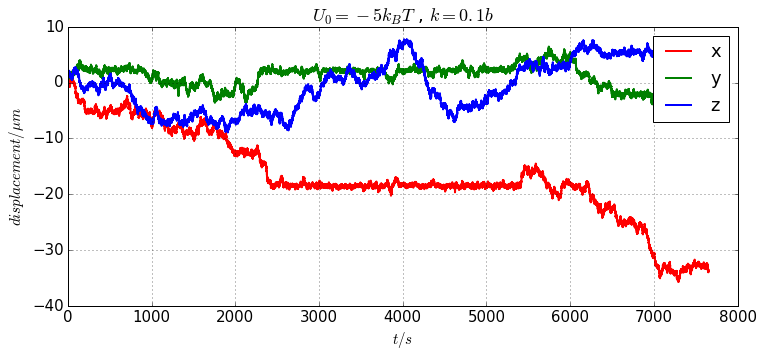

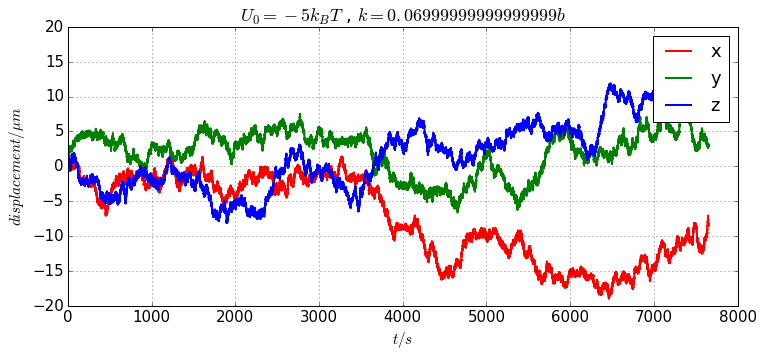

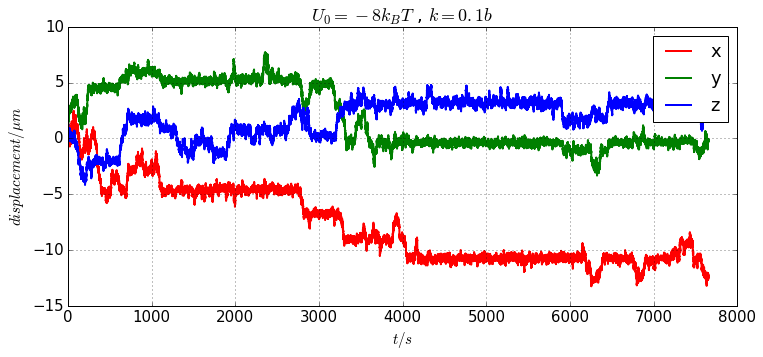

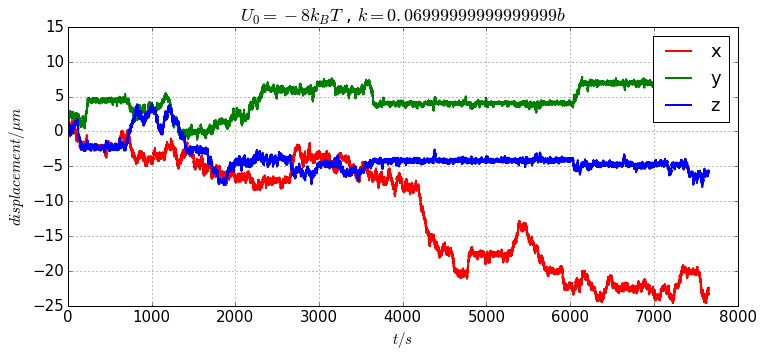

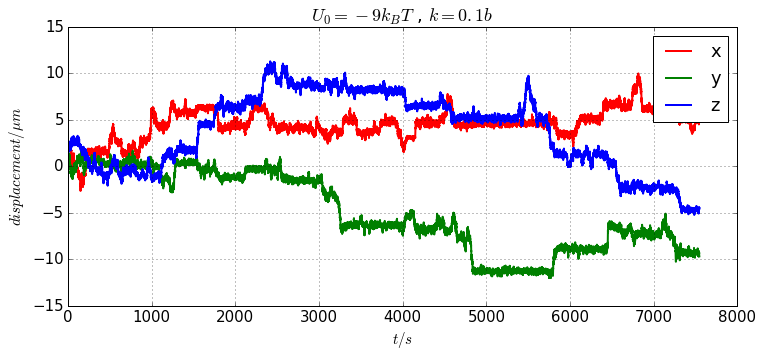

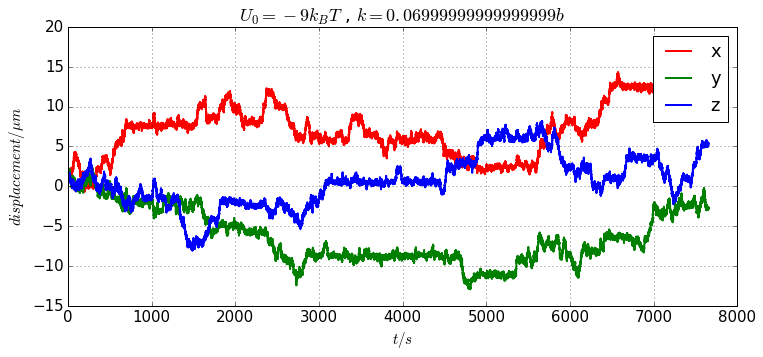

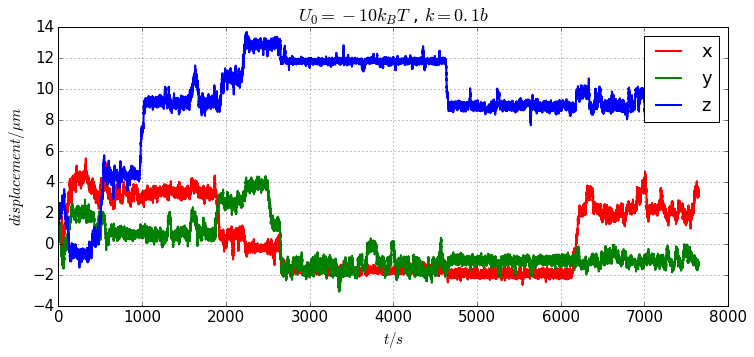

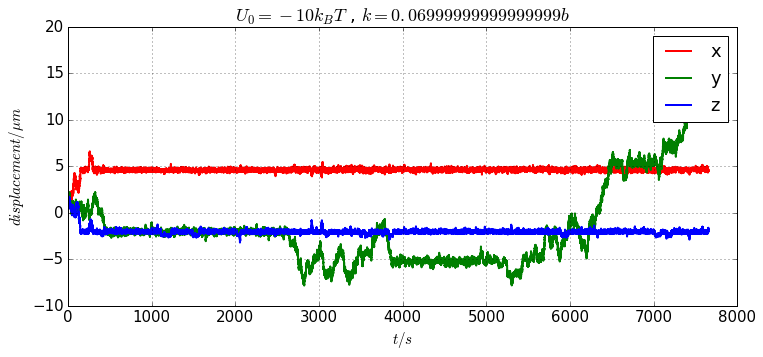

In [7]:
pltPrintPar()
i=0
for u in us:
    for k in ks:
        krel = float(k)/10.
        data = ranRodtracerData[i]
        ts = data[:,0]*tweight
        xs =  data[:,1]*xweight
        ys =  data[:,2]*xweight
        zs =  data[:,3]*xweight
        plt.figure(figsize=(12,5))
        plt.plot(ts,xs,'r-',label='x')
        plt.plot(ts,ys,'g-',label='y')
        plt.plot(ts,zs,'b-',label='z')
        #plt.xlim([0,10000])
        #plt.ylim([-15,43])
        plt.ylabel(r'$displacement / \mu m$')
        plt.xlabel(r'$t/s$')
        plt.title(r'$U_0 = '+u+'k_BT$ , $k = '+str(krel)+'b$')
        plt.grid()
        plt.legend()
        plt.show()
        i+=1

# Closer Look:

In [7]:
ks=['0.700']
p='1.2'
us=['-10']
ranRodtracerDatak07u10=[]
for u in us:
    for k in ks:
        tracerdata = []
        posfile = '/home/johann/Remote/sheldon/SPS/sim/Release/sim_data/noreset/ranRod/nrods1'
        posfile += '/dt0.0001/t200/d0/b10/p'+p+'/k'+k+'/u'+u+'/Coordinates/trajectory.txt'
        with open(posfile, 'r') as f:
            for i, line in enumerate(f):
                lines = line.split()
                tracerdata.append(lines)
                #if i==1000000: break
        ranRodtracerDatak07u10.append((np.asarray(tracerdata)).astype(float))

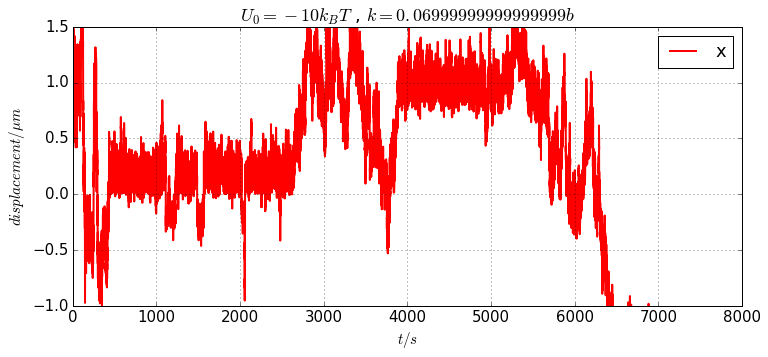

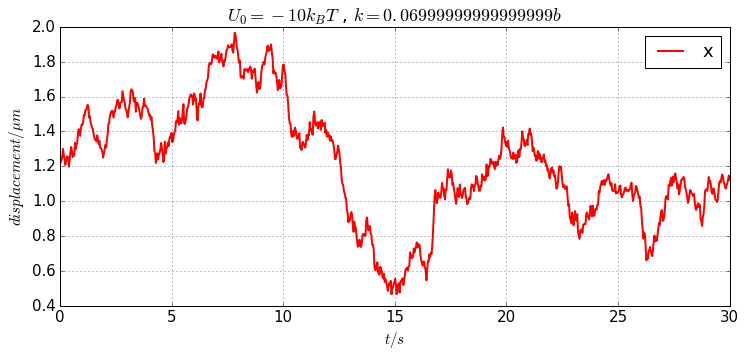

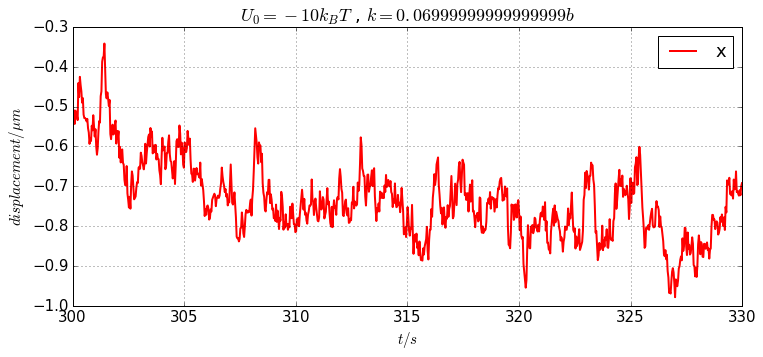

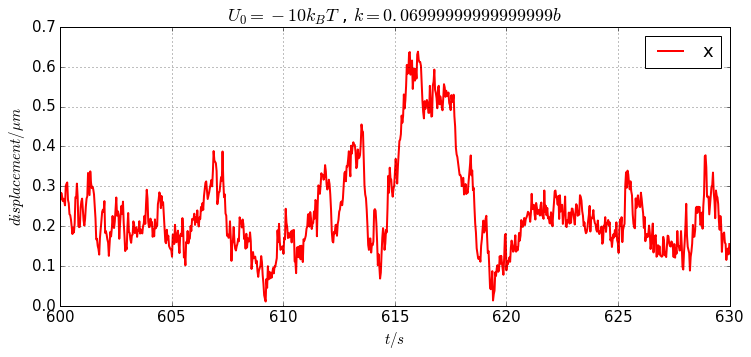

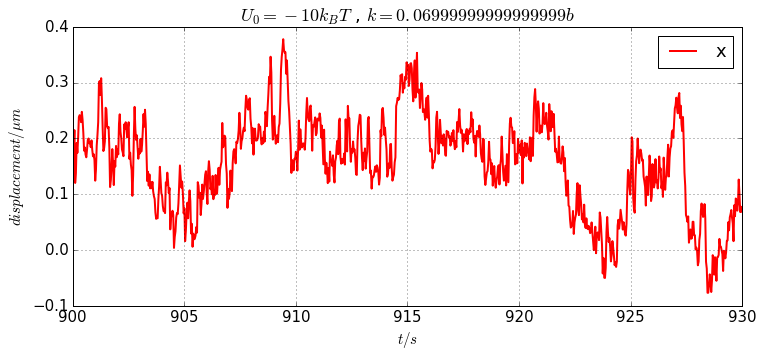

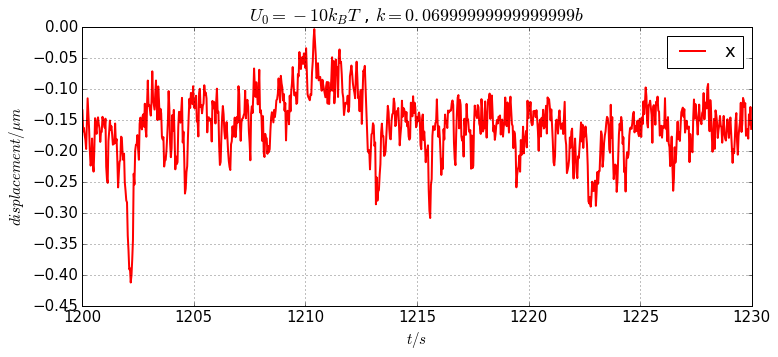

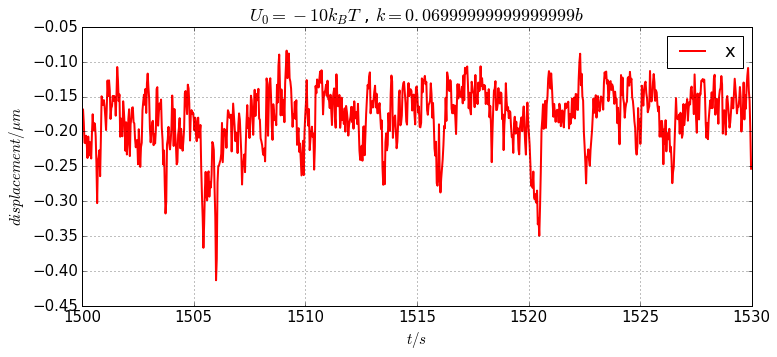

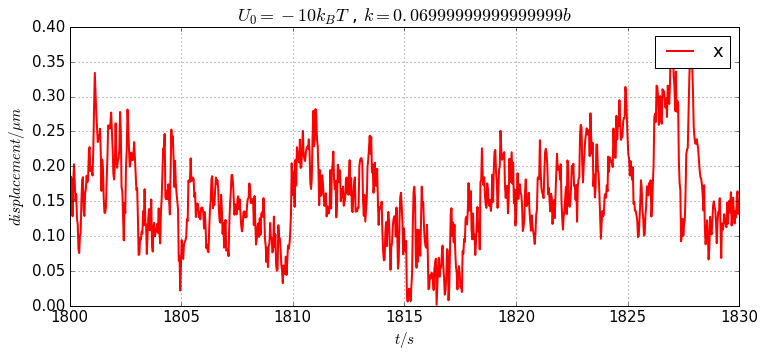

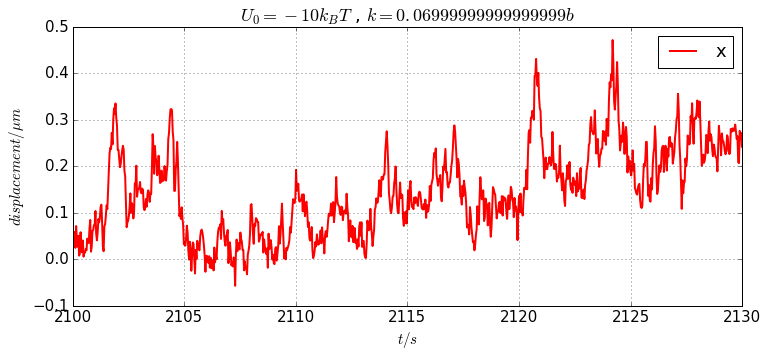

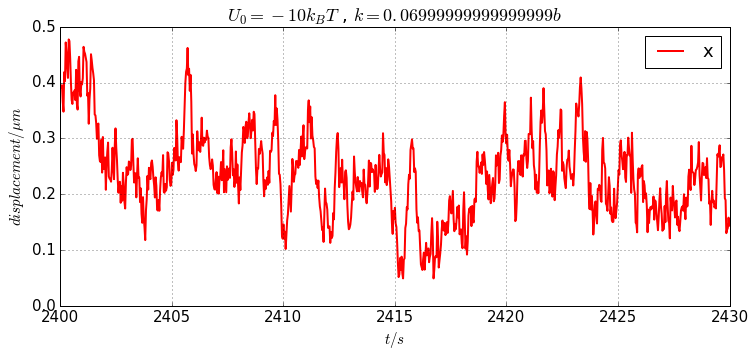

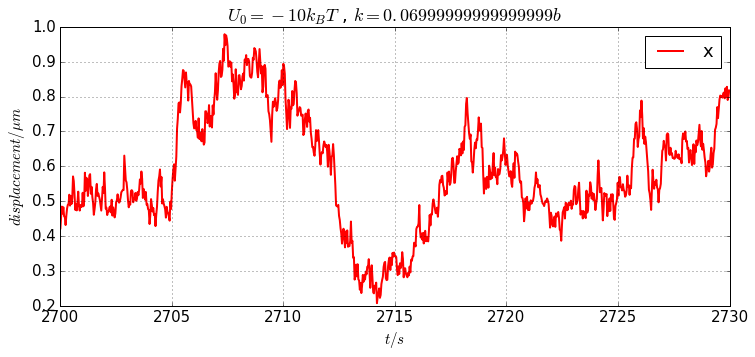

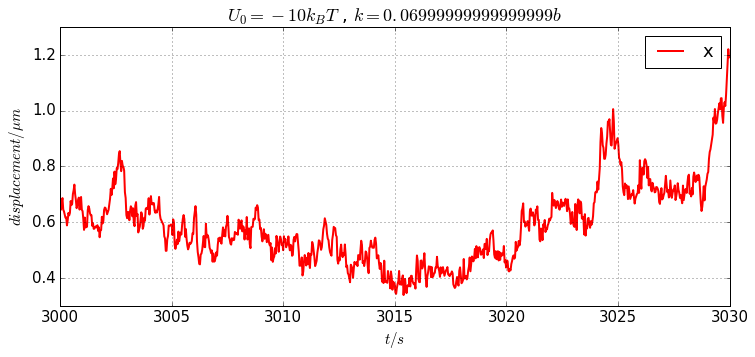

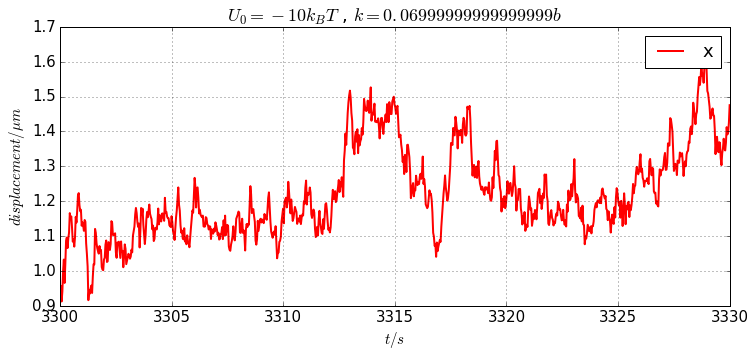

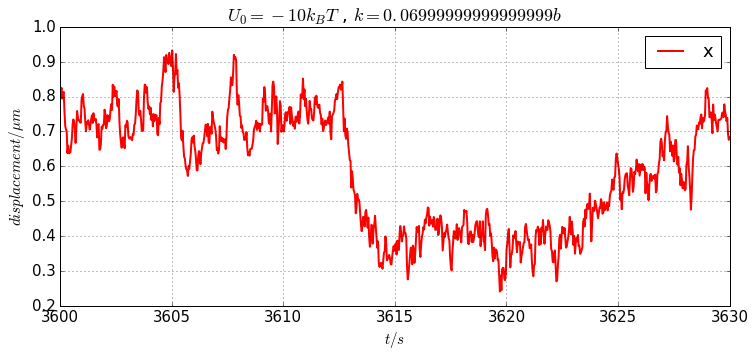

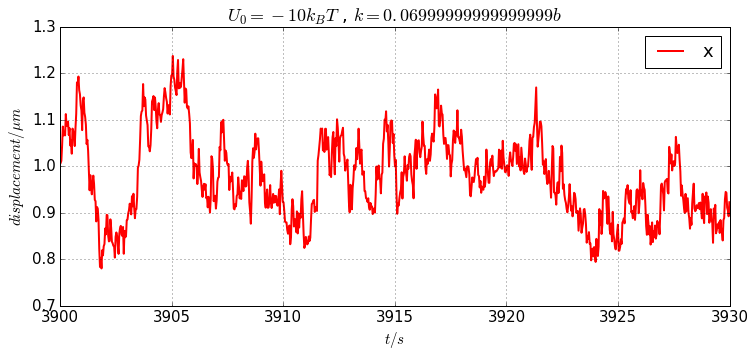

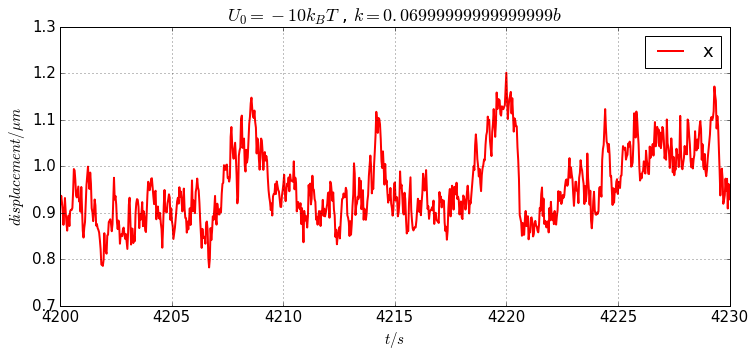

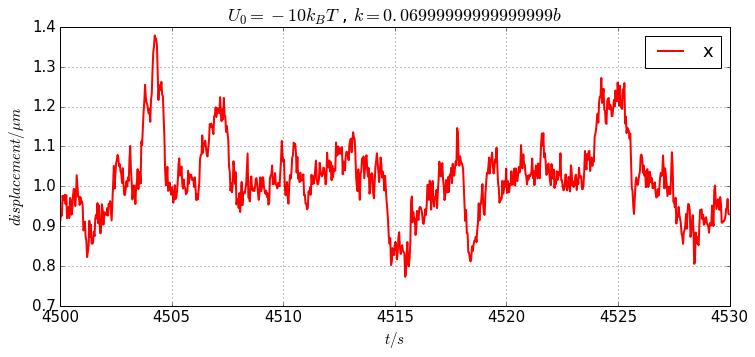

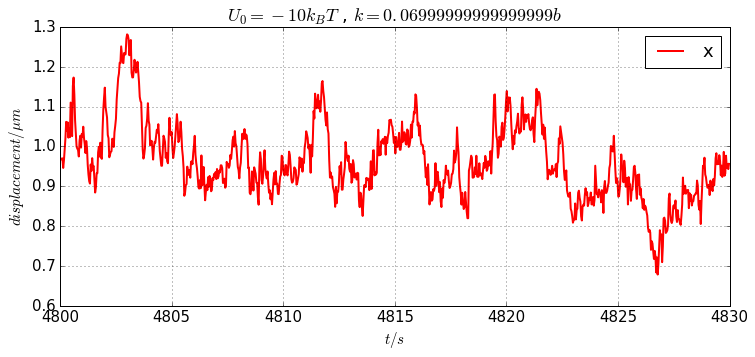

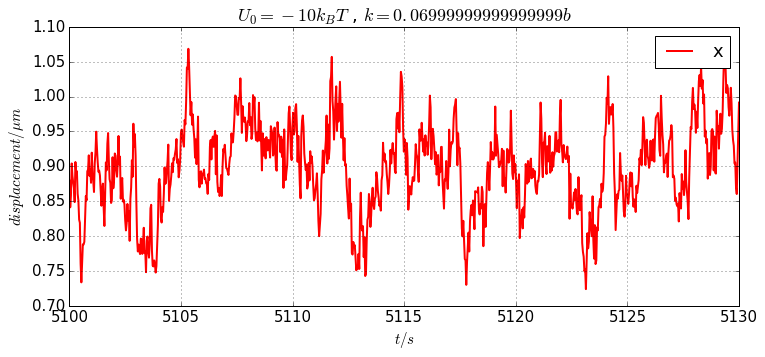

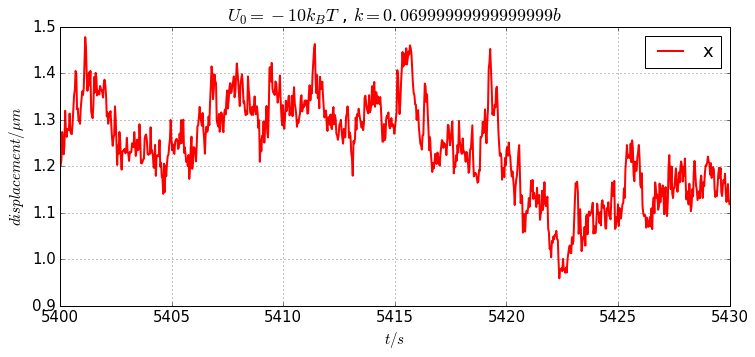

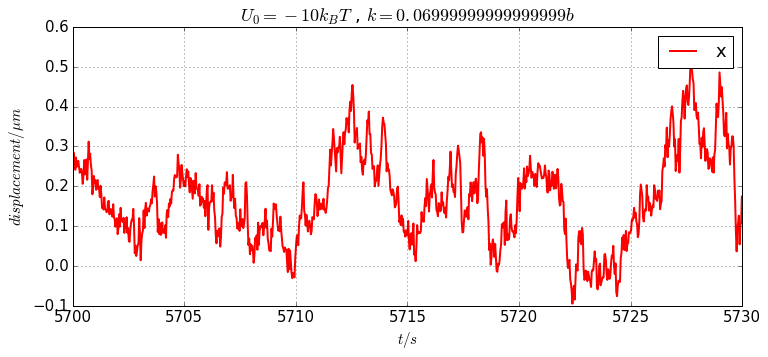

In [12]:
pltPrintPar()
i=0
for u in us:
    for k in ks:
        krel = float(k)/10.
        data = ranRodtracerDatak07u10[i]
        ts = data[:,0]*tweight
        vrs = data[:,[1,2,3]]*xweight
        vrs_rot = np.asarray([np.dot(rotation_matrix([1,1,1],np.pi/2.),v) for v in vrs])
        vrotx = vrs_rot[:,0]
        vroty = vrs_rot[:,1]
        vrotz = vrs_rot[:,2]
        #xs =  data[:,1]*xweight
        #ys =  data[:,2]*xweight
        #zs =  data[:,3]*xweight
        iplots = np.where(ts%10 == 0)
        Ntraj=int((ts[-1] - ts[0])/10)
        plt.figure(figsize=(12,5))
        plt.plot(ts,vrotx,'r-',label='x')
        #plt.plot(ts,vroty,'g-',label='y')
        #plt.plot(ts,vrotz,'b-',label='z')
        #plt.xlim([0,10000])
        #plt.ylim([-15,43])
        plt.ylabel(r'$displacement / \mu m$')
        plt.xlabel(r'$t/s$')
        plt.title(r'$U_0 = '+u+'k_BT$ , $k = '+str(krel)+'b$')
        plt.grid()
        plt.legend()
        plt.show()
        for j in range(0,20*10,10): # forget every other traj to decrease correlation
            iplot = np.arange(len(ts))[[(ts > j* 30) & (ts < (j+1)*30)]]#Julians smart way
            plt.figure(figsize=(12,5))
            plt.plot(ts[iplot],vrotx[iplot],'r-',label='x')
            #plt.plot(ts,vroty,'g-',label='y')
            #plt.plot(ts,vrotz,'b-',label='z')
            #plt.xlim([0,10000])
            #plt.ylim([-15,43])
            plt.ylabel(r'$displacement / \mu m$')
            plt.xlabel(r'$t/s$')
            plt.title(r'$U_0 = '+u+'k_BT$ , $k = '+str(krel)+'b$')
            plt.grid()
            plt.legend()
            plt.show()
        i+=1

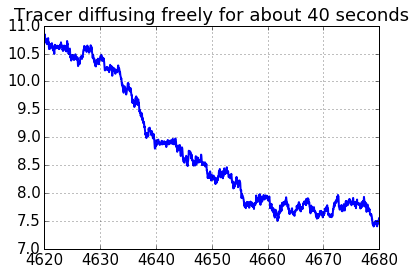

In [20]:

plt.plot(ts,vrotx)
plt.xlim([4620,4680])
plt.ylim([7,11])
plt.grid()
plt.title('Tracer diffusing freely for about 40 seconds')

In [91]:
tarr = np.array([1,2,3,4,5,5,5,5,6])
np.arange(len(tarr))[[(tarr > 3)]]

array([3, 4, 5, 6, 7, 8])

---
---







# WRONG PARTICLE SIZE p=1um. Correct is p = 0.3um

## Plot displacement x,y and z direction

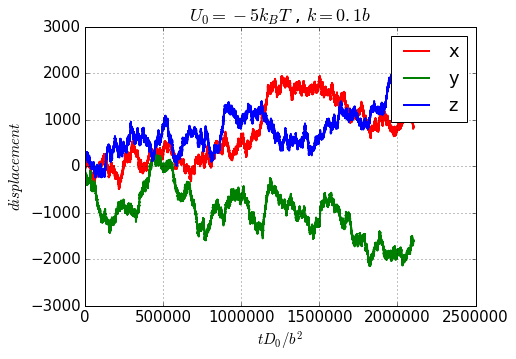

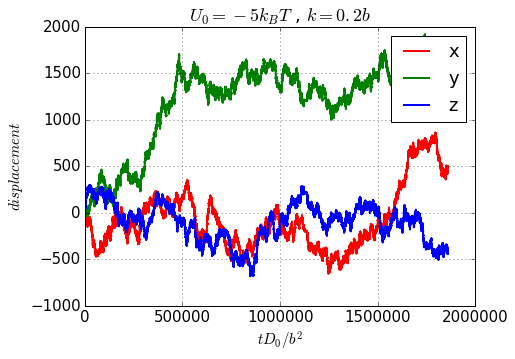

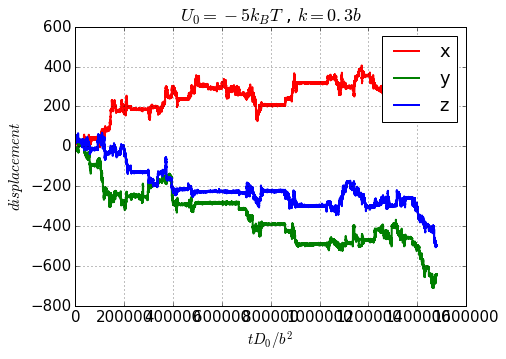

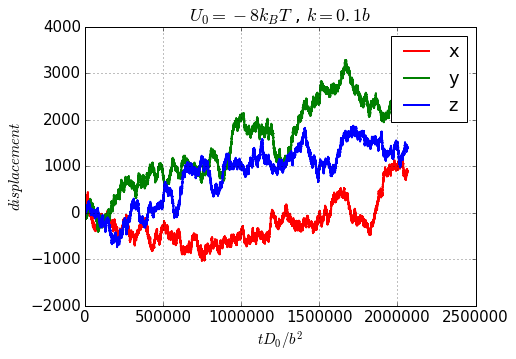

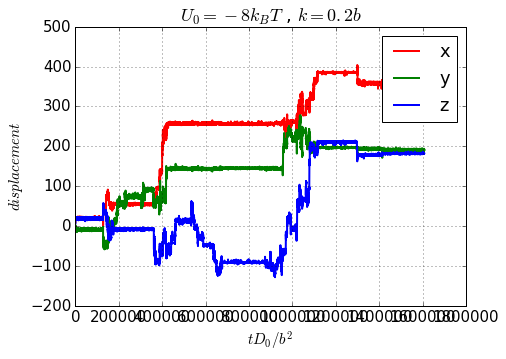

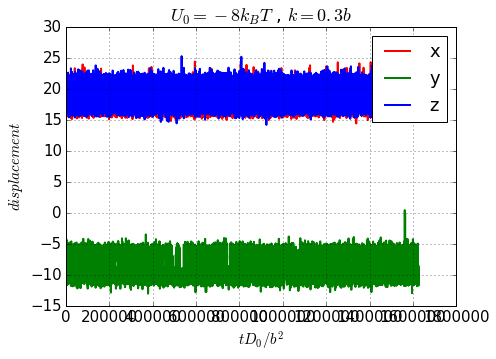

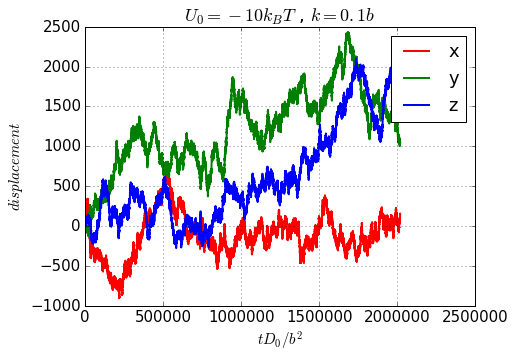

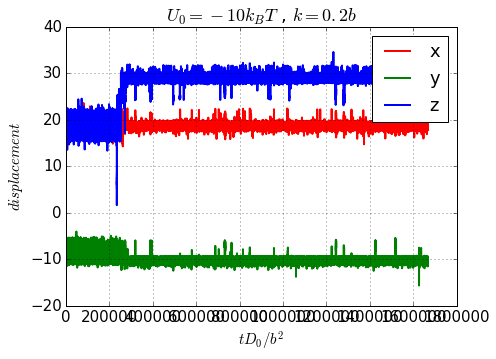

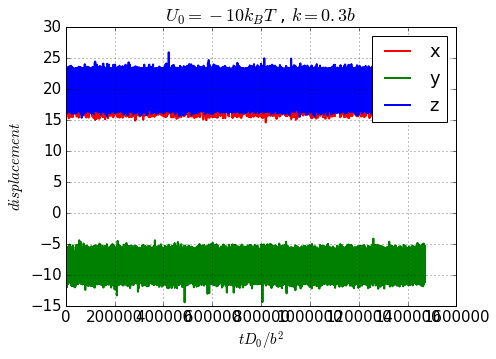

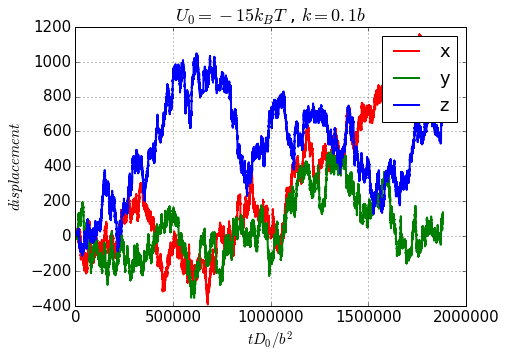

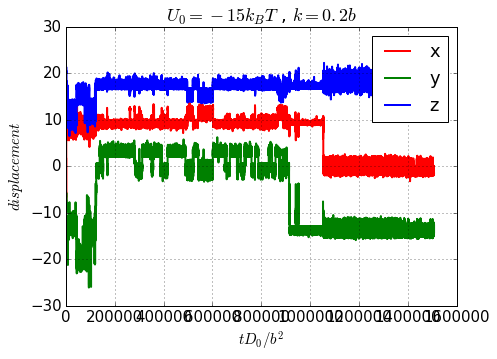

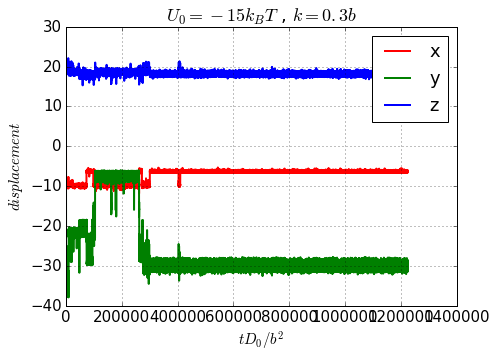

In [19]:
pltPrintPar()
i=0
for u in us:
    for k in ks:
        krel = float(k)/10.
        data = ranRodtracerData[i]
        ts = data[:,0]
        xs =  data[:,1]
        ys =  data[:,2]
        zs =  data[:,3]
        plt.figure(figsize=(7,5))
        plt.plot(ts,xs,'r-',label='x')
        plt.plot(ts,ys,'g-',label='y')
        plt.plot(ts,zs,'b-',label='z')
        #plt.xlim([0,10000])
        #plt.ylim([-15,43])
        plt.ylabel(r'$displacement$')
        plt.xlabel(r'$tD_0/b^2$')
        plt.title(r'$U_0 = '+u+'k_BT$ , $k = '+str(krel)+'b$')
        plt.grid()
        plt.legend()
        plt.show()
        i+=1

## Maybe more 'realistic' - Plot displacement in xy, yz, zx - directions
In the experiment, we look from above onto a disordered system. Hence, we will not see a particle that is trapped in zx direction, but still slides along chain in y direction. We will only see 'trapped' or 'not 'trapped'.
$$r_{xy} = \sqrt{r_x^2 + r_y^2}$$

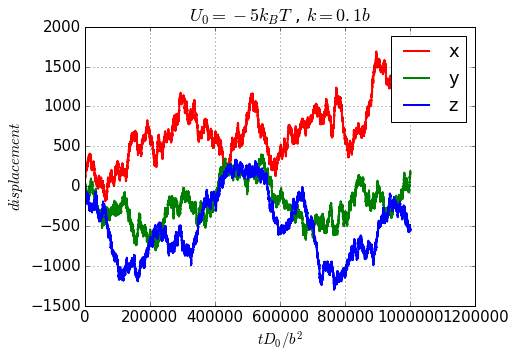

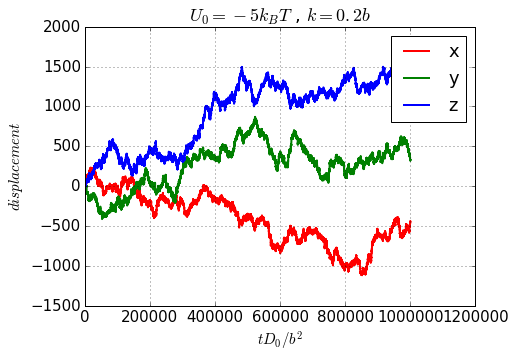

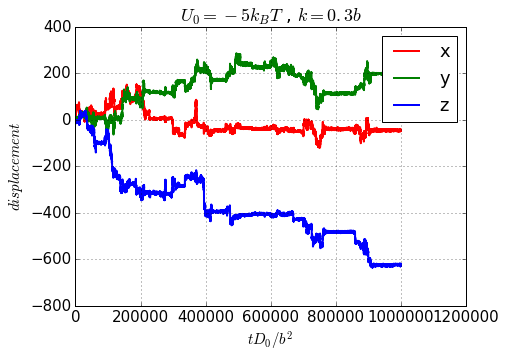

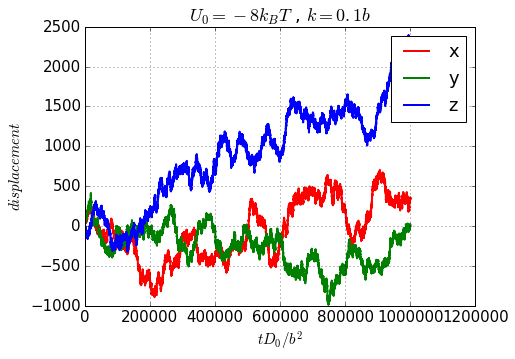

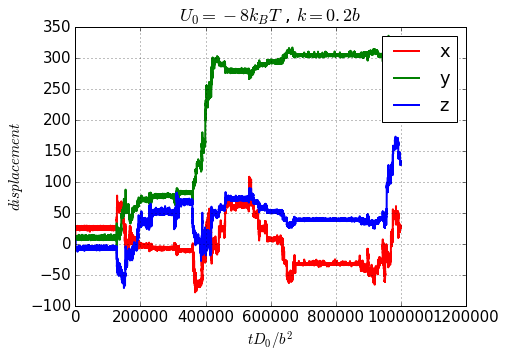

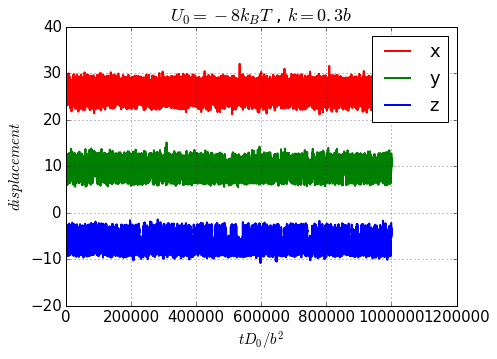

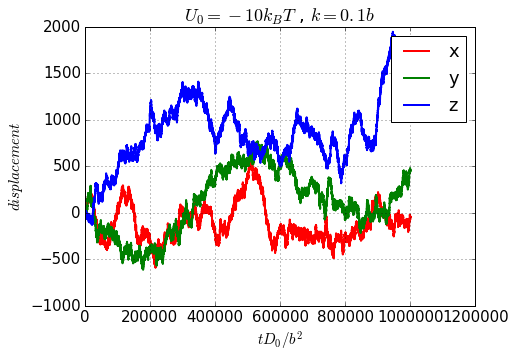

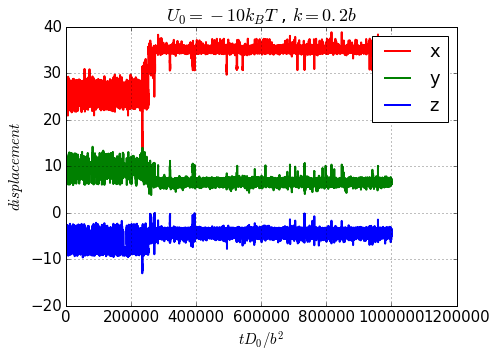

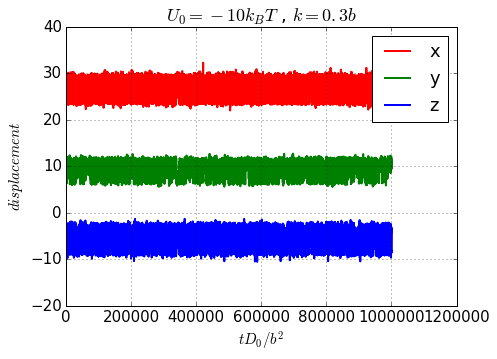

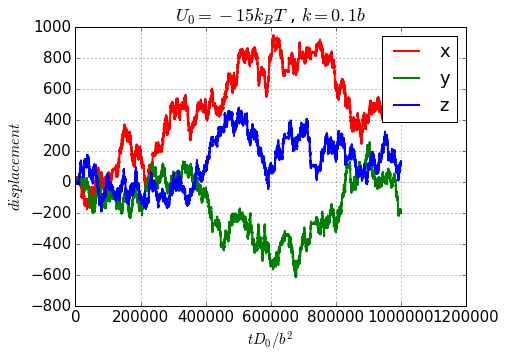

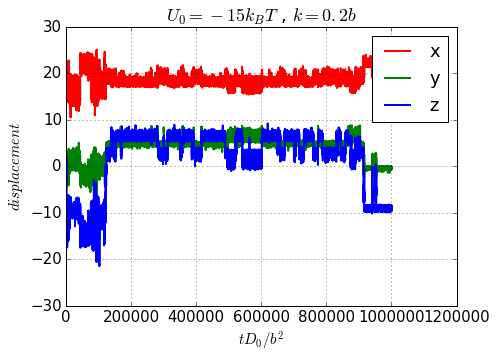

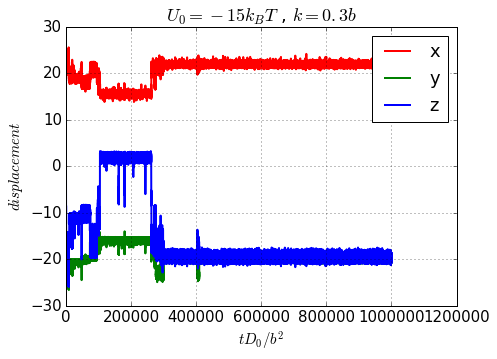

In [21]:

pltPrintPar()
i=0
for u in us:
    for k in ks:
        krel = float(k)/10.
        data = ranRodtracerData[i]
        ts = data[:,0]
        #vxs =  [[x[1],0,0] for x in data]
        #vys =  [0,[x[2],0] for x in data]
        #vzs =  [0,0,[x[3]] for x in data]
        vrs = data[:,[1,2,3]]
        vrs_rot = np.asarray([np.dot(rotation_matrix([1,1,1],np.pi/2.),v) for v in vrs])
        #print(vrs_rot)
        vrotx = vrs_rot[:,0]
        vroty = vrs_rot[:,1]
        vrotz = vrs_rot[:,2]
        #xys = np.sqrt(xs**2 + ys**2)
        #yzs = np.sqrt(ys**2 + zs**2)
        #zxs = np.sqrt(zs**2 + xs**2)
        #rxys = [np.sqrt(v.dot(v)) for v in vxy]
        #ryzs = [np.sqrt(v.dot(v)) for v in vyz]
        #rzxs = [np.sqrt(v.dot(v)) for v in vzx]
        #xys = np.sqrt(xs**2 + ys**2)
        #yzs = np.sqrt(ys**2 + zs**2)
        #zxs = np.sqrt(zs**2 + xs**2)
        plt.figure(figsize=(7,5))
        plt.plot(ts,vrotx,'r-',label='x')
        plt.plot(ts,vroty,'g-',label='y')
        plt.plot(ts,vrotz,'b-',label='z')
        #plt.xlim([0,10000])
        #plt.ylim([-15,43])
        plt.ylabel(r'$displacement$')
        plt.xlabel(r'$tD_0/b^2$')
        plt.title(r'Rotated coordinate system: $U_0 = '+u+'k_BT$ , $k = '+str(krel)+'b$')
        plt.grid()
        plt.legend()
        plt.show()
        i+=1

## Write a script to test if the particle is mobile or immobile.
## Use it, to compare to Lieleg - Langmuir, 2013 data
Define: The tracer particle is immobile, if it does not (or barely) move in x and y and z direction.
I.e. test change of $$r = \sqrt{x^2 + y^2 + z^2}$$
I know, that the particle has a diameter of p = 0.3b. I.e., itis effectively trapped, if r 

In [22]:
# TEST:  U_0 = -8kT, k = 0.2b
ks=['2.000']
p='3'
us=['-8']
ranRodks2p3=[]
for u in us:
    for k in ks:
        tracerdata = []
        posfile = '/home/johann/Remote/sheldon/SPS/sim/Release/sim_data/noreset/ranRod/nrods1'
        posfile += '/dt0.0005/t100/d0/b10/p'+p+'/k'+k+'/u'+u+'/Coordinates/trajectory.txt'
        with open(posfile, 'r') as f:
            for i, line in enumerate(f):
                lines = line.split()
                tracerdata.append(lines)
                if i==100000: break
        ranRodks2p3.append((np.asarray(tracerdata)).astype(float))


TypeError: list indices must be integers or slices, not tuple

(90, 95)

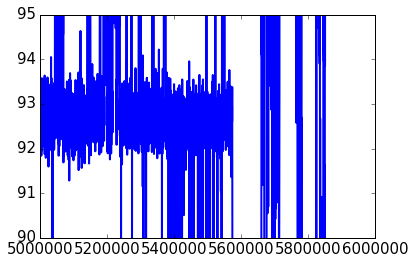

In [56]:
data = ranRodks2p3[0]
ts = data[:,0]
rs = np.asarray([np.sqrt(r.dot(r)) for r in data[:,1:]])
plt.plot(ts*tweight,rs)
#plt.ylim([250,350])
plt.xlim([0.5e7,0.5e7+1000000])
plt.ylim([90,95])

# Ran POTENTIAL

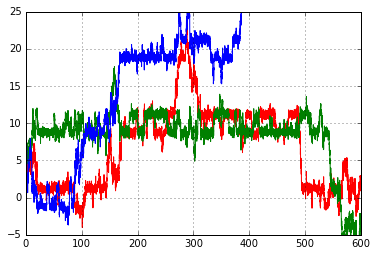

In [34]:
k='0.500'
p='3'
u='100'
tracerk05p3u100 = readTracerData(k,p,u)
ts = tracerk05p3u100[:,0]
xs =  tracerk05p3u100[:,1]
ys =  tracerk05p3u100[:,2]
zs =  tracerk05p3u100[:,3]
plt.plot(ts,xs,'r-',ts,ys,'g-',ts,zs,'b-')
plt.xlim([0,600])
plt.ylim([-5,25])
plt.grid()

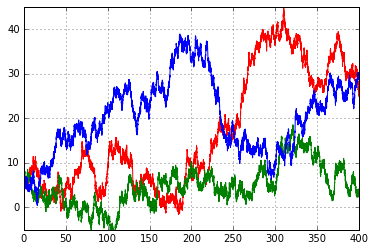

In [30]:
k='0.200'
p='3'
u='500'
tracerk05p3u100 = readTracerData(k,p,u)
ts = tracerk05p3u100[:,0]
xs =  tracerk05p3u100[:,1]
ys =  tracerk05p3u100[:,2]
zs =  tracerk05p3u100[:,3]
plt.plot(ts,xs,'r-',ts,ys,'g-',ts,zs,'b-')
plt.xlim([0,400])
plt.ylim([-5,45])
plt.grid()